In [18]:
import os, shutil

In [19]:


train_datadir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\dogs-vs-cats\\train\\train'


base_dir = 'C:\\Users\\Prashant\\Desktop\\Deep learning with python\\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)



In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]

for fname in fnames:
    src = os.path.join(train_datadir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
#Check




In [21]:
print('Cat training images:',len(os.listdir(train_cats_dir)))
print('Dogs training images:',len(os.listdir(train_dogs_dir)))

print('Cats validation images:',len(os.listdir(validation_cats_dir)))


Cat training images: 1000
Dogs training images: 1000
Cats validation images: 500


In [22]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [24]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [25]:
# Data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
for data_batch , label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape: ',label_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
label batch shape:  (20,)


In [45]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=30,
                             validation_data= validation_generator,
                             validation_steps=50)

Epoch 1/30
10/10 [==============================] - 139s 14s/step - loss: 0.3471 - acc: 0.8400 - val_loss: 0.2846 - val_acc: 0.8730
Epoch 2/30
10/10 [==============================] - 136s 14s/step - loss: 0.3091 - acc: 0.8650 - val_loss: 0.2857 - val_acc: 0.8660
Epoch 3/30
10/10 [==============================] - 133s 13s/step - loss: 0.3348 - acc: 0.8700 - val_loss: 0.2537 - val_acc: 0.8920
Epoch 4/30
10/10 [==============================] - 134s 13s/step - loss: 0.3394 - acc: 0.8600 - val_loss: 0.2640 - val_acc: 0.8900
Epoch 5/30
10/10 [==============================] - 135s 14s/step - loss: 0.2788 - acc: 0.8800 - val_loss: 0.2399 - val_acc: 0.8950
Epoch 6/30
 1/10 [==>...........................] - ETA: 26s - loss: 0.2772 - acc: 0.9000

KeyboardInterrupt: 

In [43]:
model.save('cats_and_dogs_1.h5')

In [30]:
import matplotlib.pyplot as plt

In [ ]:


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()
plt.show()

In [28]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
) 

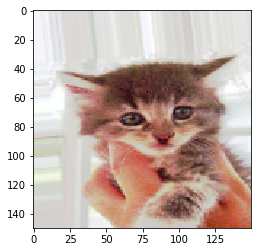

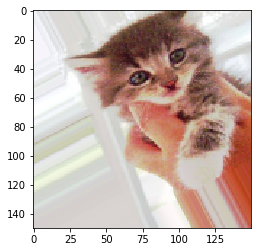

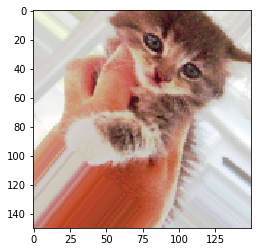

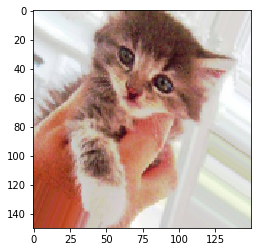

In [31]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
         fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()
    

In [32]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer= keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode='binary')
history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
 8/10 [=======================>......] - ETA: 3s - loss: 0.6885 - acc: 0.5250

KeyboardInterrupt: 

# Pretrained Convnet


In [34]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [35]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [36]:
model = tf.keras.Sequential([
    conv_base,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
conv_base.trainable = False

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:

model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
 3/10 [========>.....................] - ETA: 30s - loss: 0.9942 - acc: 0.5167

KeyboardInterrupt: 

In [40]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [42]:
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])
history = model.fit_generator(train_generator,
                             steps_per_epoch=10,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
10/10 [==============================] - 238s 24s/step - loss: 0.5252 - acc: 0.7700 - val_loss: 0.4498 - val_acc: 0.8130
Epoch 2/100
10/10 [==============================] - 238s 24s/step - loss: 0.4817 - acc: 0.7700 - val_loss: 0.4604 - val_acc: 0.7660
Epoch 3/100
10/10 [==============================] - 239s 24s/step - loss: 0.4786 - acc: 0.7550 - val_loss: 0.3916 - val_acc: 0.8360
Epoch 4/100
10/10 [==============================] - 238s 24s/step - loss: 0.4116 - acc: 0.8350 - val_loss: 0.3527 - val_acc: 0.8560
Epoch 5/100
10/10 [==============================] - 233s 23s/step - loss: 0.4563 - acc: 0.8050 - val_loss: 0.3357 - val_acc: 0.8670
Epoch 6/100
10/10 [==============================] - 239s 24s/step - loss: 0.4440 - acc: 0.8050 - val_loss: 0.3293 - val_acc: 0.8650
Epoch 7/100
10/10 [==============================] - 233s 23s/step - loss: 0.3750 - acc: 0.8550 - val_loss: 0.3437 - val_acc: 0.8450
Epoch 8/100
10/10 [==============================] - 237s 24s/step - 

KeyboardInterrupt: 

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator,steps=50)